In [3]:
import requests
import base64
import json
import pytesseract
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
plt.style.use('dark_background')

In [4]:
# Sample image file is available at http://plates.openalpr.com/ea7the.jpg
IMAGE_PATH = 'res.png'
SECRET_KEY = 'sk_3ad45d755d67600b8fcb0a78'

with open(IMAGE_PATH, 'rb') as image_file:
    img_base64 = base64.b64encode(image_file.read())

url = 'https://api.openalpr.com/v2/recognize_bytes?recognize_vehicle=1&country=kor&secret_key=%s' % (SECRET_KEY)
r = requests.post(url, data = img_base64)
json_data = r.json()

In [5]:
json_data['results'][0]['plate']

'52주3108'

In [6]:
x1_co = json_data['results'][0]['coordinates'][0]['x']
y1_co = json_data['results'][0]['coordinates'][0]['y']
x2_co = json_data['results'][0]['coordinates'][2]['x']
y2_co = json_data['results'][0]['coordinates'][2]['y']
x1_co, y1_co, x2_co, y2_co

(-3, 22, 414, 112)

In [7]:
img = Image.open(IMAGE_PATH)
area = (x1_co, y1_co, x2_co, y2_co)
crop = img.crop(area)
crop.save('found_plate.png')

# Front plate cut

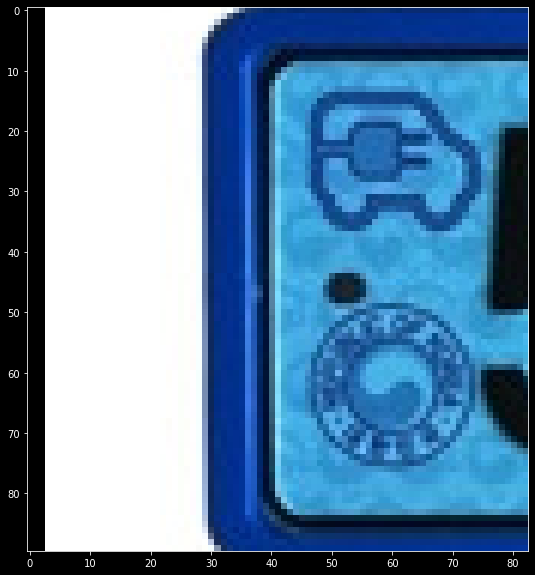

In [8]:
PLATE_PATH = 'found_plate.png'
plate_img = cv2.imread(PLATE_PATH)
height, width, channel = plate_img.shape

x1 = crop.size[0]
y2 = crop.size[1]
plate = Image.open(PLATE_PATH)

area_2 = (0,0,x1*0.2,y2)
crop_plate = plate.crop(area_2)
crop_plate.save('found_plate_front.png')
plt.figure(figsize= (12,10))
plt.imshow(crop_plate, cmap='gray')

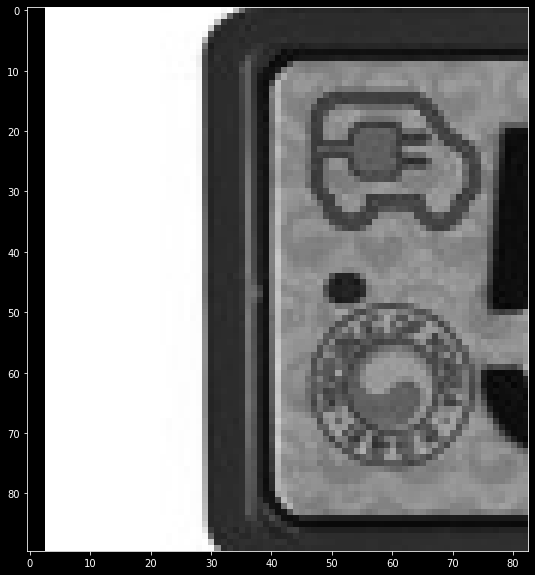

In [9]:
crop_plate = cv2.imread('found_plate_front.png')
gray = cv2.cvtColor(crop_plate, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 10))
plt.imshow(gray, cmap='gray')

In [29]:
x = int(crop_plate.shape[0] * 0.5)
y = int(crop_plate.shape[1] * 0.5)
x, y

(45, 41)

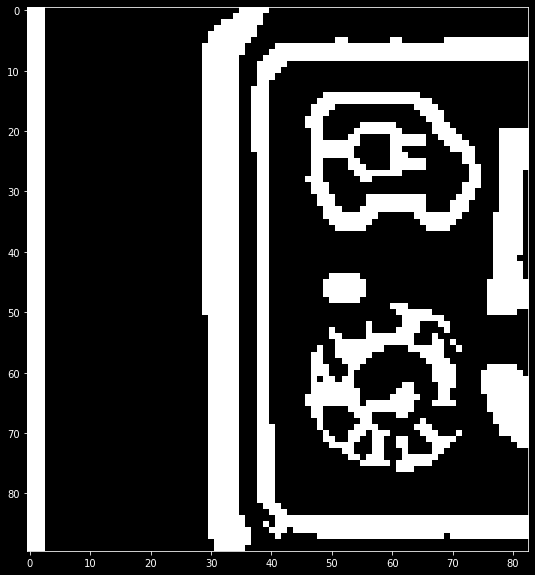

In [39]:
img_blurred = cv2.GaussianBlur(gray, (3,3),0)

img_thresh = cv2.adaptiveThreshold(
    img_blurred, 
    maxValue=255.0, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=19, 
    C=9
)

plt.figure(figsize=(12, 10))
plt.imshow(img_thresh, cmap='gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x1e716347e48>,
 <matplotlib.image.AxesImage at 0x1e7163b2ba8>)

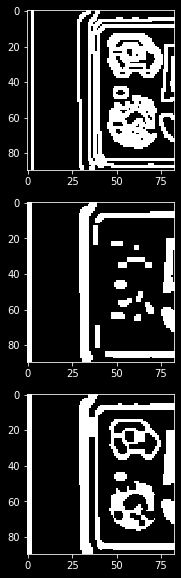

In [41]:
kernel = np.ones( (3,3), np.uint8)

grad = cv2.morphologyEx(img_thresh, cv2.MORPH_GRADIENT, kernel)

opening = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, kernel)

closing = cv2.morphologyEx(img_thresh, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(12,10))
plt.subplot(311), plt.imshow(grad,cmap='gray')
plt.subplot(312), plt.imshow(opening,cmap='gray')
plt.subplot(313), plt.imshow(closing,cmap='gray')

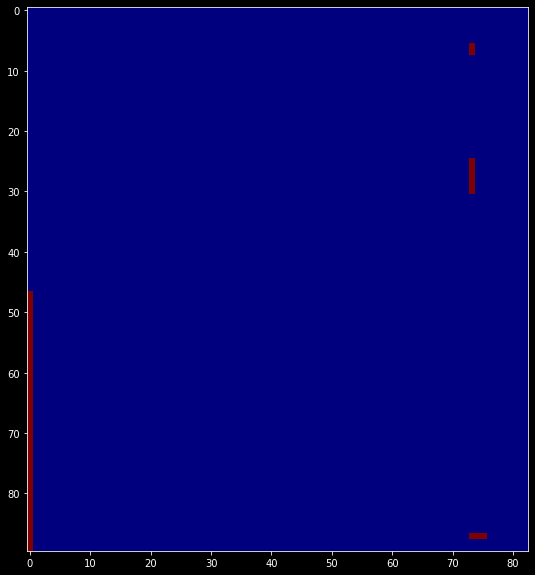

In [43]:
img = closing.copy()
template = cv2.imread('evmark.png',0)
template = cv2.resize(template, dsize=(x,y) ,interpolation=cv2.INTER_AREA )
w, h = template.shape[::-1]

res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF)
threshold = 0.9
loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):  # Switch collumns and rows
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)
    
plt.figure(figsize=(12,10))
plt.imshow(img, cmap='jet')

# Middle plate cut

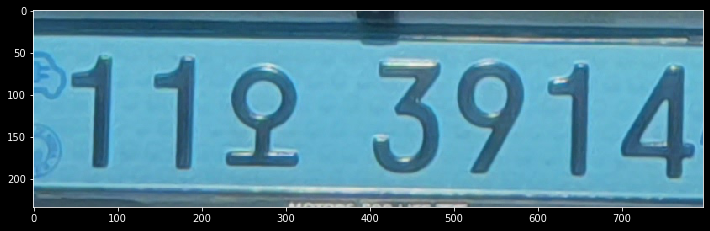

In [26]:
PLATE_PATH = 'found_plate.png'
plate_img = cv2.imread(PLATE_PATH)
height, width, channel = plate_img.shape

x1 = crop.size[0]
y2 = crop.size[1]
plate = Image.open(PLATE_PATH)

area_2 = (x1*0.15,0,x1*0.85,y2)
crop_plate = plate.crop(area_2)
crop_plate.save('found_plate_middle.png')
plt.figure(figsize= (12,10))
plt.imshow(crop_plate, cmap='gray')

# end plate cut

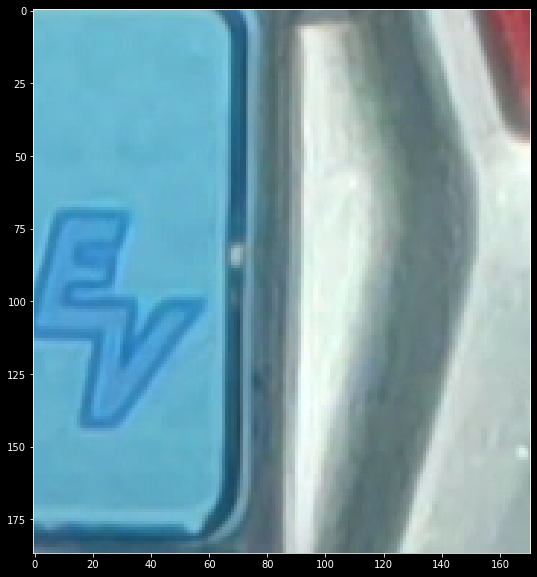

In [31]:
PLATE_PATH = 'found_plate.png'
plate_img = cv2.imread(PLATE_PATH)
height, width, channel = plate_img.shape

x1 = crop.size[0]
y2 = crop.size[1]
plate = Image.open(PLATE_PATH)

area_2 = (x1*0.85,y2*0.2,x1,y2)
crop_plate = plate.crop(area_2)
crop_plate.save('found_plate_end.png')
plt.figure(figsize= (12,10))
plt.imshow(crop_plate, cmap='gray')

In [13]:
x = int(crop_plate.size[0] * 0.5)
y = int(crop_plate.size[1] * 0.5)
x, y

(78, 127)

In [ ]:
img = cv2.imread('found_plate.png',0)

laplacian = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)

laplacian = cv2.Canny(laplacian, 100, 200)

plt.imshow(laplacian, cmap='gray')

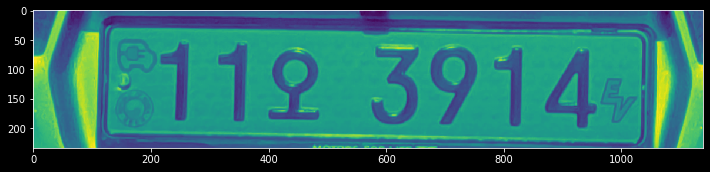

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

TEMPLATE_PATH = 'evmark.JPG'

img_rgb = cv2.imread('found_plate.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread(TEMPLATE_PATH,0)
# Template resize
template = cv2.resize(template, dsize=(x,y) ,interpolation=cv2.INTER_AREA )

w, h = template.shape[::-1]
 
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCORR)
threshold = 0.9
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.figure(figsize= (12,10))
plt.imshow(img_gray)

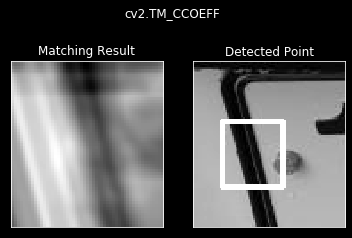

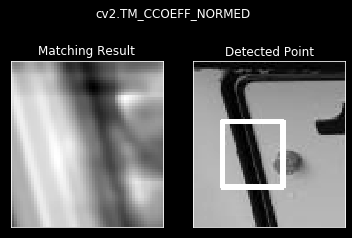

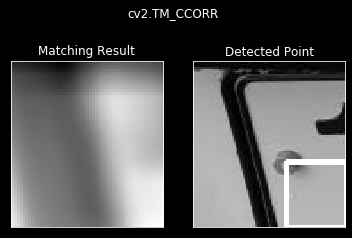

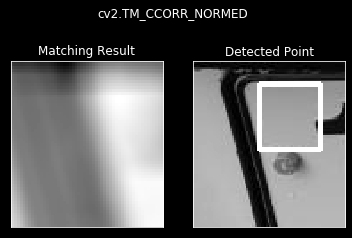

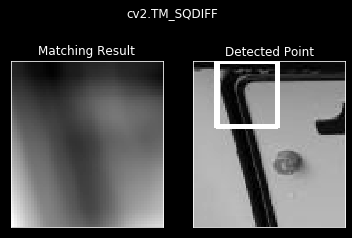

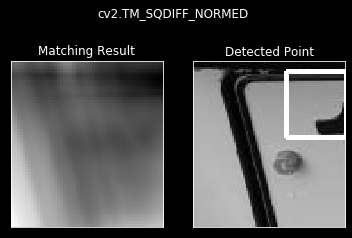

In [390]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


TEMPLATE_PATH = 'evmark.JPG'
img = cv2.imread(PLATE_PATH,0)
img2 = img.copy()
template = cv2.imread(TEMPLATE_PATH,0)
template = cv2.resize(template, dsize=(x,y) ,interpolation=cv2.INTER_AREA )
w, h = template.shape[::-1]


# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)


    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc



    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)


    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [18]:
# BGR(파랑색)
color = [255, 0, 0]
# cvtColor 함수의 입력으로 사용할 수 있도록 한 픽셀로 구성된 이미지로 변환한다.
pixel = np.uint8([[color]])
# cvtColor를 사용하여 HSV 색공간으로 변환한다.
hsv = cv2.cvtColor(pixel, cv2.COLOR_BGR2HSV)
# HSV값을 출력하기위해 픽셀값만 갖고온다.
hsv = hsv[0][0]

# bgr과 hsv 값 출력
print("bgr: ", color)
print("hsv: ", hsv)

img_color = cv2.imread('found_plate.jpg')

height, width = img_color.shape[:2]

img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)

lower_blue = (120-10, 30, 30)
upper_blue = (120+10, 255, 255)
# 앞서 선언한 범위값을 사용하여 바이너리 이미지를 얻는다.(범위내에 있는 픽셀들은 흰색이되고 나머지는 검은색이 된다.)
img_mask = cv2.inRange(img_hsv, lower_blue, upper_blue)

# 원본이미지에서 범위값에 해당하는 영상부분을 흭득한다.
img_result = cv2.bitwise_and(img_color, img_color, mask = img_mask)

# 화면에 영상결과들 보여준다.
cv2.imshow('img_color', img_color)
cv2.imshow('img_mask', img_mask)
cv2.imshow('img_result', img_result)


bgr:  [255, 0, 0]
hsv:  [120 255 255]
